In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn as skl

from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

from sklearn.metrics import average_precision_score
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

base_path = "d:/work/stackoverflow/"

Using TensorFlow backend.


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/device:GPU:0']

In [3]:
def data_divider(data, per=0.8, shuffle=True):
    if shuffle:
        data = data.sample(frac=1).reset_index(drop=True)
    rr = round(len(data.index) * per)
    return data[:rr], data[rr:]

def get_norms(ser):
    return normalize(ser[:,np.newaxis], axis=0).ravel()

In [4]:
data = pd.read_csv(base_path + 'text.csv')

data['title_overlap'] = get_norms(data['title_overlap'])
data['ans_count'] = get_norms(data['ans_count'])
data['questions_count'] = get_norms(data['questions_count'])
data['reached_people'] = get_norms(data['reached_people'])
#data['user_rating'] = get_norms(data['user_rating'])

data = data.drop(['id_post', 'id_user'], axis=1)

data[:5]

,ans_count,questions_count,reached_people,user_rating,debug_inf,title_overlap,post_type
0,0.000000,0.000285,1.399707e-06,19,0,0.004051,1
1,0.000000,0.000071,6.220922e-07,1,0,0.000000,0
2,0.000000,0.000036,2.151402e-07,1,0,0.003686,1
3,0.000037,0.000142,1.407484e-06,9,0,0.002233,1
4,0.000018,0.001958,2.929018e-04,725,0,0.003889,1


In [5]:
train_data, test_data = data_divider(data)

In [6]:
x_train = train_data.drop('post_type', axis=1)
y_train = train_data['post_type']
x_test = test_data.drop('post_type', axis=1)
y_test = test_data['post_type']

In [7]:
classifier = Sequential()

In [8]:
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.4, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.4, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = SGD(momentum=0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

d:\programs\python3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="uniform")`
  import sys
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Upda

In [9]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
_________________________________________________________________
dropout_3 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

In [10]:
history = classifier.fit(x_train, y_train, validation_split=0.2, batch_size = 20, nb_epoch = 20)

d:\programs\python3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 43921 samples, validate on 10981 samples
Epoch 1/20
43921/43921 [==============================] - 11s 253us/step - loss: 0.6453 - accuracy: 0.6602 - val_loss: 0.6440 - val_accuracy: 0.6556
Epoch 2/20
43921/43921 [==============================] - 11s 246us/step - loss: 0.6409 - accuracy: 0.6603 - val_loss: 0.6440 - val_accuracy: 0.6556
Epoch 3/20
43921/43921 [==============================] - 11s 260us/step - loss: 0.6409 - accuracy: 0.6603 - val_loss: 0.6439 - val_accuracy: 0.6556
Epoch 4/20
43921/43921 [==============================] - 11s 260us/step - loss: 0.6409 - accuracy: 0.6603 - val_loss: 0.6439 - val_accuracy: 0.6556
Epoch 5/20
43921/43921 [==============================] - 11s 241us/step - loss: 0.6409 - accuracy: 0.6603 - val_loss: 0.6439 - val_accuracy: 0.6556
Epoch 6/20
43921/43921 [==============================] - 10s 235us/step - loss: 0.6409 - accuracy: 0.6603 - val_loss: 0.6440 - val_accuracy: 0.6556
Epoch 7/20
43921/43921 [==============================] 

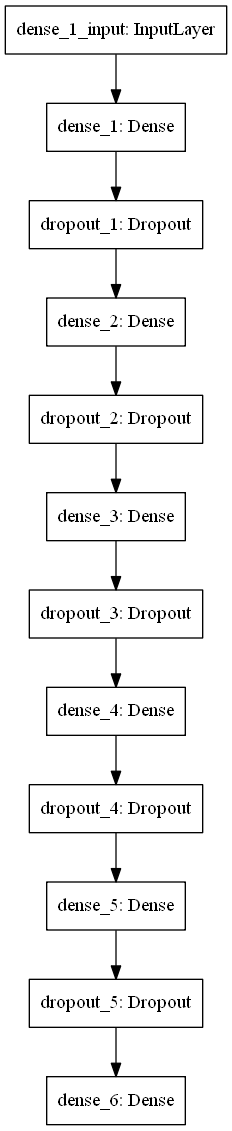

In [11]:
prediction = classifier.predict(x_test).tolist()
plot_model(classifier, to_file=f"model.png")

In [12]:
res = []
for i in prediction:
    if i[0] >= 0.5:
        res.append(1)
    else:
        res.append(0)

all_c = len(y_test.index)
right = 0
for i in range(len(y_test)):
    if res[i] == y_test.iloc[i]:
        right += 1
acc = right / all_c
print('accuracy: {}'.format(acc))

average_precision = average_precision_score(y_test, res)
f1_score = skl.metrics.f1_score(res, y_test)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('F1 score: {}'.format(f1_score))

accuracy: 0.6550342415853125
Average precision-recall score: 0.66
F1 score: 0.7915657877360567


Train: 0.659, Test: 0.655


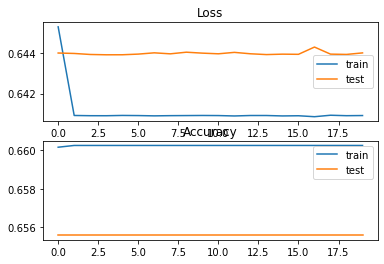

In [13]:
# evaluate the model
_, train_acc = classifier.evaluate(x_train, y_train, verbose=0)
_, test_acc = classifier.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [14]:
classifier.save("model_tmp")